<a href="https://colab.research.google.com/github/Fadiasitinursifa/UAS_PCD/blob/main/Klasifikasi_Fruit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
from os import listdir
from sklearn.preprocessing import  LabelBinarizer
from keras.preprocessing import image
from keras_preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split

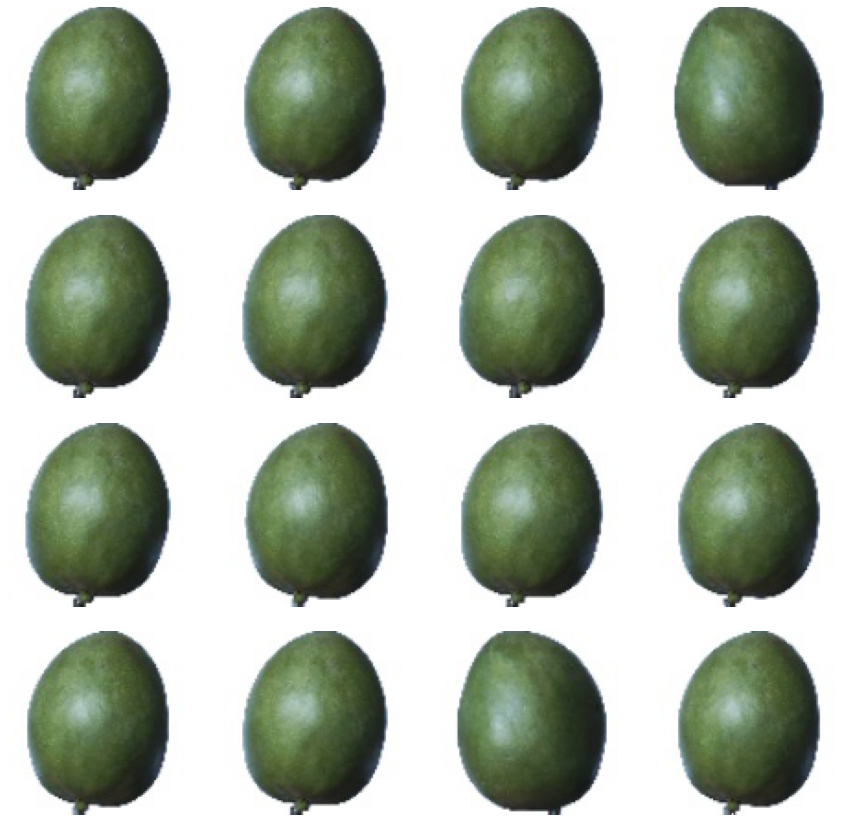

In [ ]:
# Ploting 12 image to checking dataset 
plt.figure(figsize=(12, 12))
path = '/content/drive/MyDrive/Colab Notebooks/dataset/Mango'
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)
    plt.axis('off')

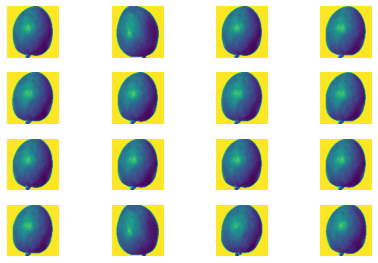

In [ ]:
for  x in range(1,17):
    plt.subplot(4,4,x)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    gray_img = cv2.cvtColor(rand_img, cv2.COLOR_RGB2GRAY)
    plt.imshow(gray_img)
    plt.xlabel(gray_img.shape[1], fontsize = 10)
    plt.ylabel(gray_img.shape[0], fontsize = 10)
    plt.axis('off')

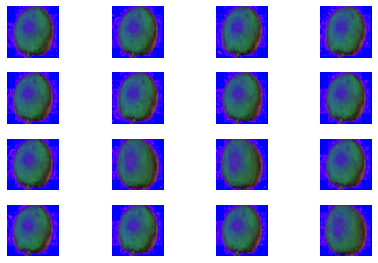

In [ ]:
for y in range(1,17):
    plt.subplot(4,4,y)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    hsv_img = cv2.cvtColor(rand_img, cv2.COLOR_RGB2HSV)
    plt.imshow(hsv_img)
    plt.xlabel(hsv_img.shape[1], fontsize = 10)
    plt.ylabel(hsv_img.shape[0], fontsize = 10)
    plt.axis('off')

In [ ]:
dir = '/content/drive/MyDrive/Colab Notebooks/dataset'
root_dir = listdir(dir)
image_list, label_list = [], []

In [ ]:
# Reading and converting image to numpy array 
for directory in root_dir:
  for files in listdir(f'{dir}/{directory}'):
    image_path = f'{dir}/{directory}/{files}'
    image = cv2.imread(image_path)
    image = img_to_array(image)
    image_list.append(image)
    label_list.append(directory)

In [ ]:
# Visualize the number of class count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

Grape Blue     28
Avocado        24
Lemon          24
Strawbery      24
Banana         23
Mango          23
Papaya         23
Pear           23
Orange         22
Leyche         19
Grape White    18
Kiwi           18
Dates          17
Tommato 1      12
Apple Red1      1
dtype: int64

In [ ]:
# Storing number of class
num_classes = len(label_counts)
num_classes

15

In [ ]:
# Checking input image shape
image_list[0].shape

(100, 100, 3)

In [ ]:
# Checking Labels shape 
label_list = np.array(label_list)
label_list.shape

(299,)

In [ ]:
# Splitting dataset
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 15) 

In [ ]:
# Normalize and reshape data 
x_train = np.array(x_train, dtype = np.float64) / 225.0
x_test = np.array(x_test, dtype = np.float64) / 225.0
x_train = x_train.reshape(-1, 224, 224, 3)
x_test = x_test.reshape(-1, 224, 224, 3)


ValueError: ignored

In [ ]:
# Label binarizing 
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['Apple Red1' 'Avocado' 'Banana' 'Dates' 'Grape Blue' 'Grape White' 'Kiwi'
 'Lemon' 'Leyche' 'Mango' 'Orange' 'Papaya' 'Pear' 'Strawbery' 'Tommato 1']


In [ ]:
# Spliting the training data set into training and validation datasets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [ ]:
# Building model architecture
model = Sequential()
model.add(Conv2D(8, (3, 3), padding="same",input_shape=(224,224,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 8)        0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 74, 74, 16)        1168      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 37, 37, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 37, 37, 32)        4640      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 18, 18, 32)      

In [ ]:
# Compiling model 
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0005), metrics=['accuracy'])

In [ ]:
# Training the model 
epochs = 10
batch_size = 130


In [ ]:
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/10


ValueError: ignored